In [6]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse

In [7]:
directory = open("C:/Users/Lenovo/Desktop/IITH/Sem 6/CDAM/Task2/MAIL_TO_REG_STUD_214275_2059189_20230225_102209_284.csv")
dset = pd.read_csv(directory,skip_blank_lines = True, comment = '#',header = 0)
df = dset[['decimal date', 'average']]
df

,decimal date,average
0,1958.2027,315.70
1,1958.2877,317.45
2,1958.3699,317.51
3,1958.4548,317.24
4,1958.5370,315.86
...,...,...
774,2022.7083,415.95
775,2022.7917,415.78
776,2022.8750,417.51
777,2022.9583,418.95


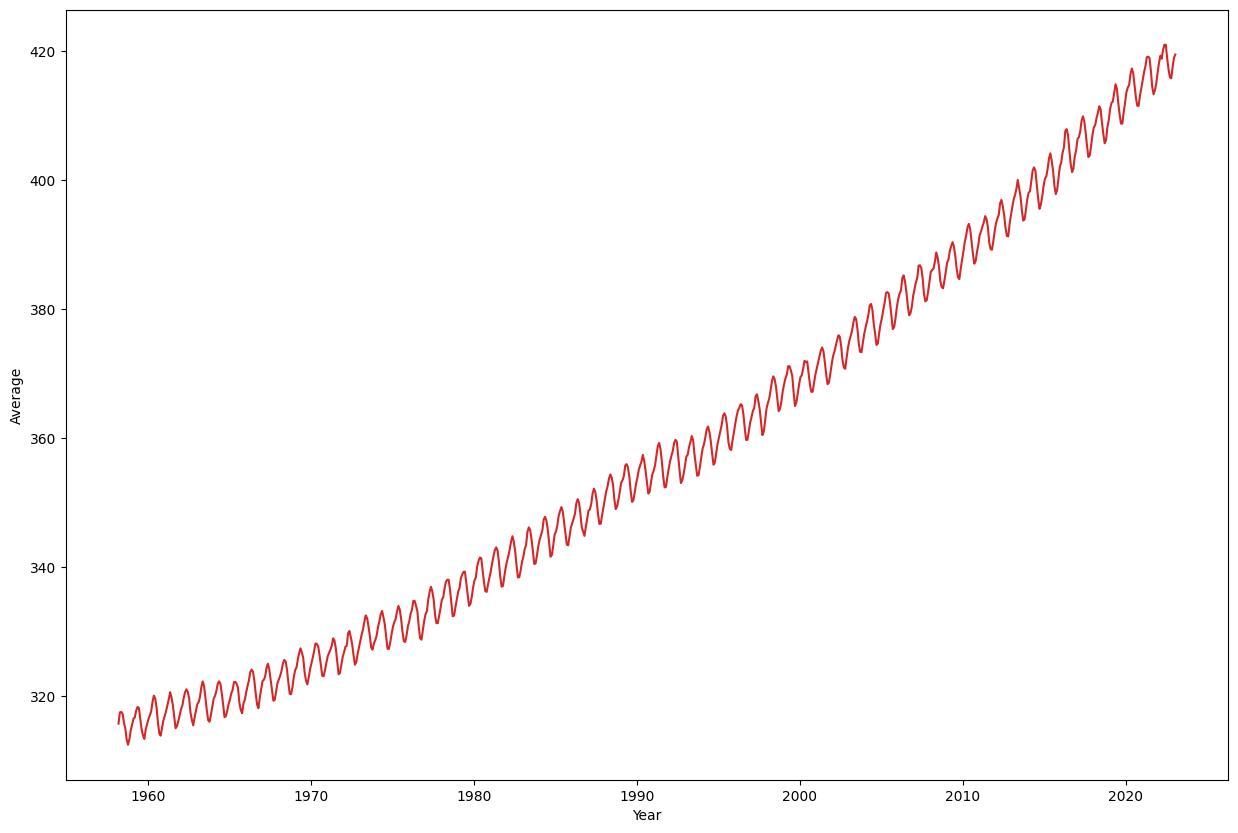

In [8]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Average', dpi=100):
    plt.figure(figsize=(15,10), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    
plot_df(df, x=df['decimal date'], y=df['average'])

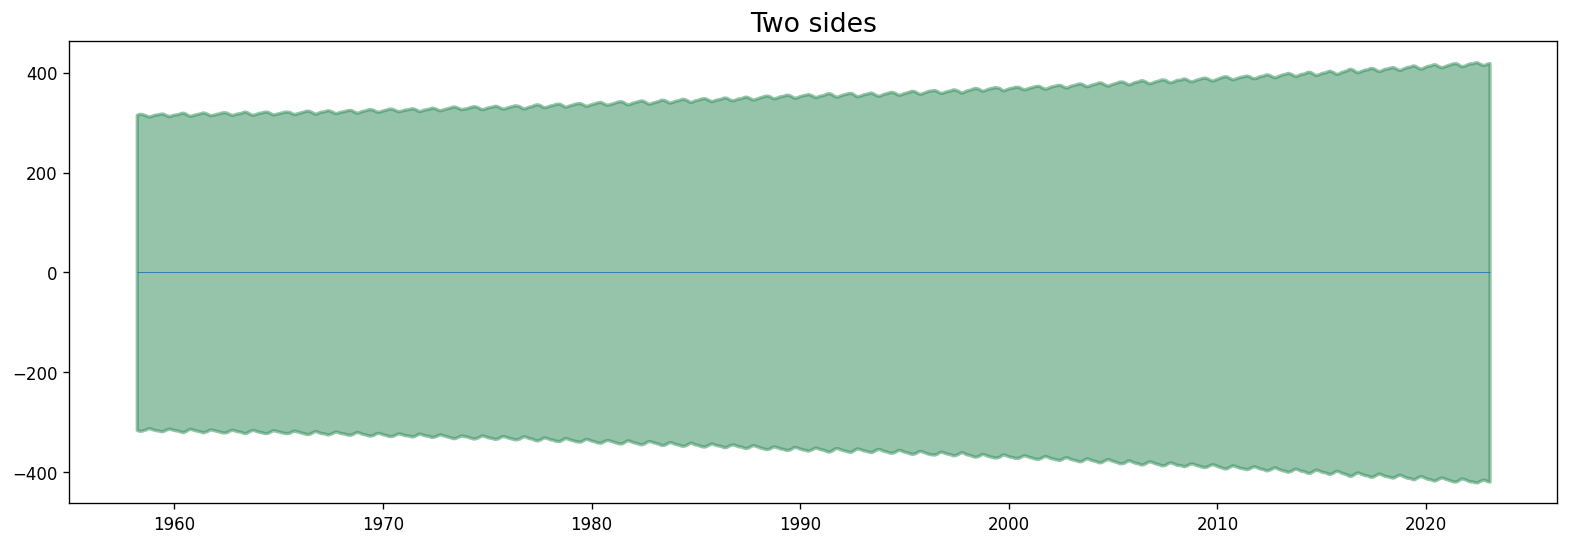

In [9]:
x = df['decimal date'].values
y1 = df['average'].values

# Plot
fig, ax = plt.subplots(1, 1, figsize=(16,5), dpi= 120)
plt.fill_between(x, y1=y1, y2=-y1, alpha=0.5, linewidth=2, color='seagreen')
# plt.ylim(-800, 800)
plt.title('Two sides', fontsize=16)
plt.hlines(y=0, xmin=np.min(df['decimal date']), xmax=np.max(df['decimal date']), linewidth=.5)
plt.show()

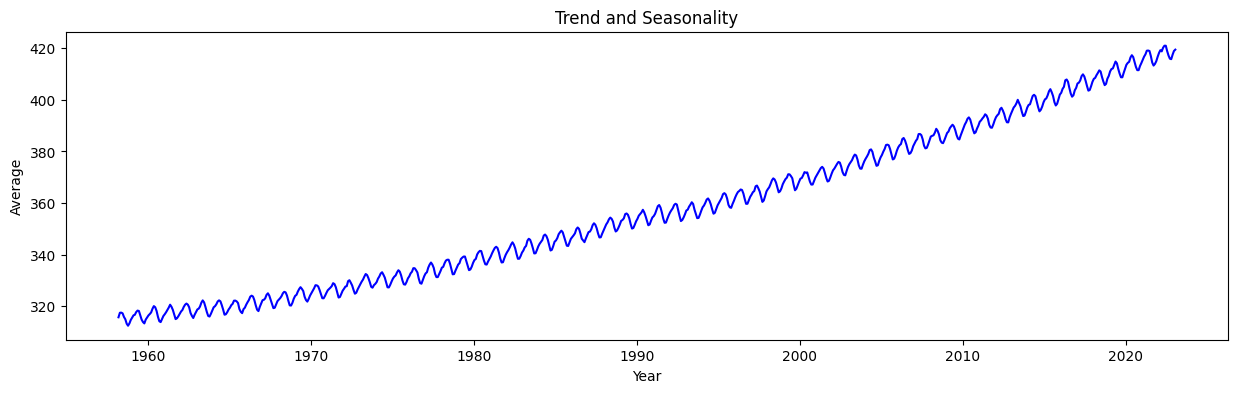

In [10]:
def plot_df(df, x, y, title="", xlabel='Year', ylabel='Average', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='blue')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()
    

plot_df(df, x=df['decimal date'], y=df['average'], title='Trend and Seasonality')

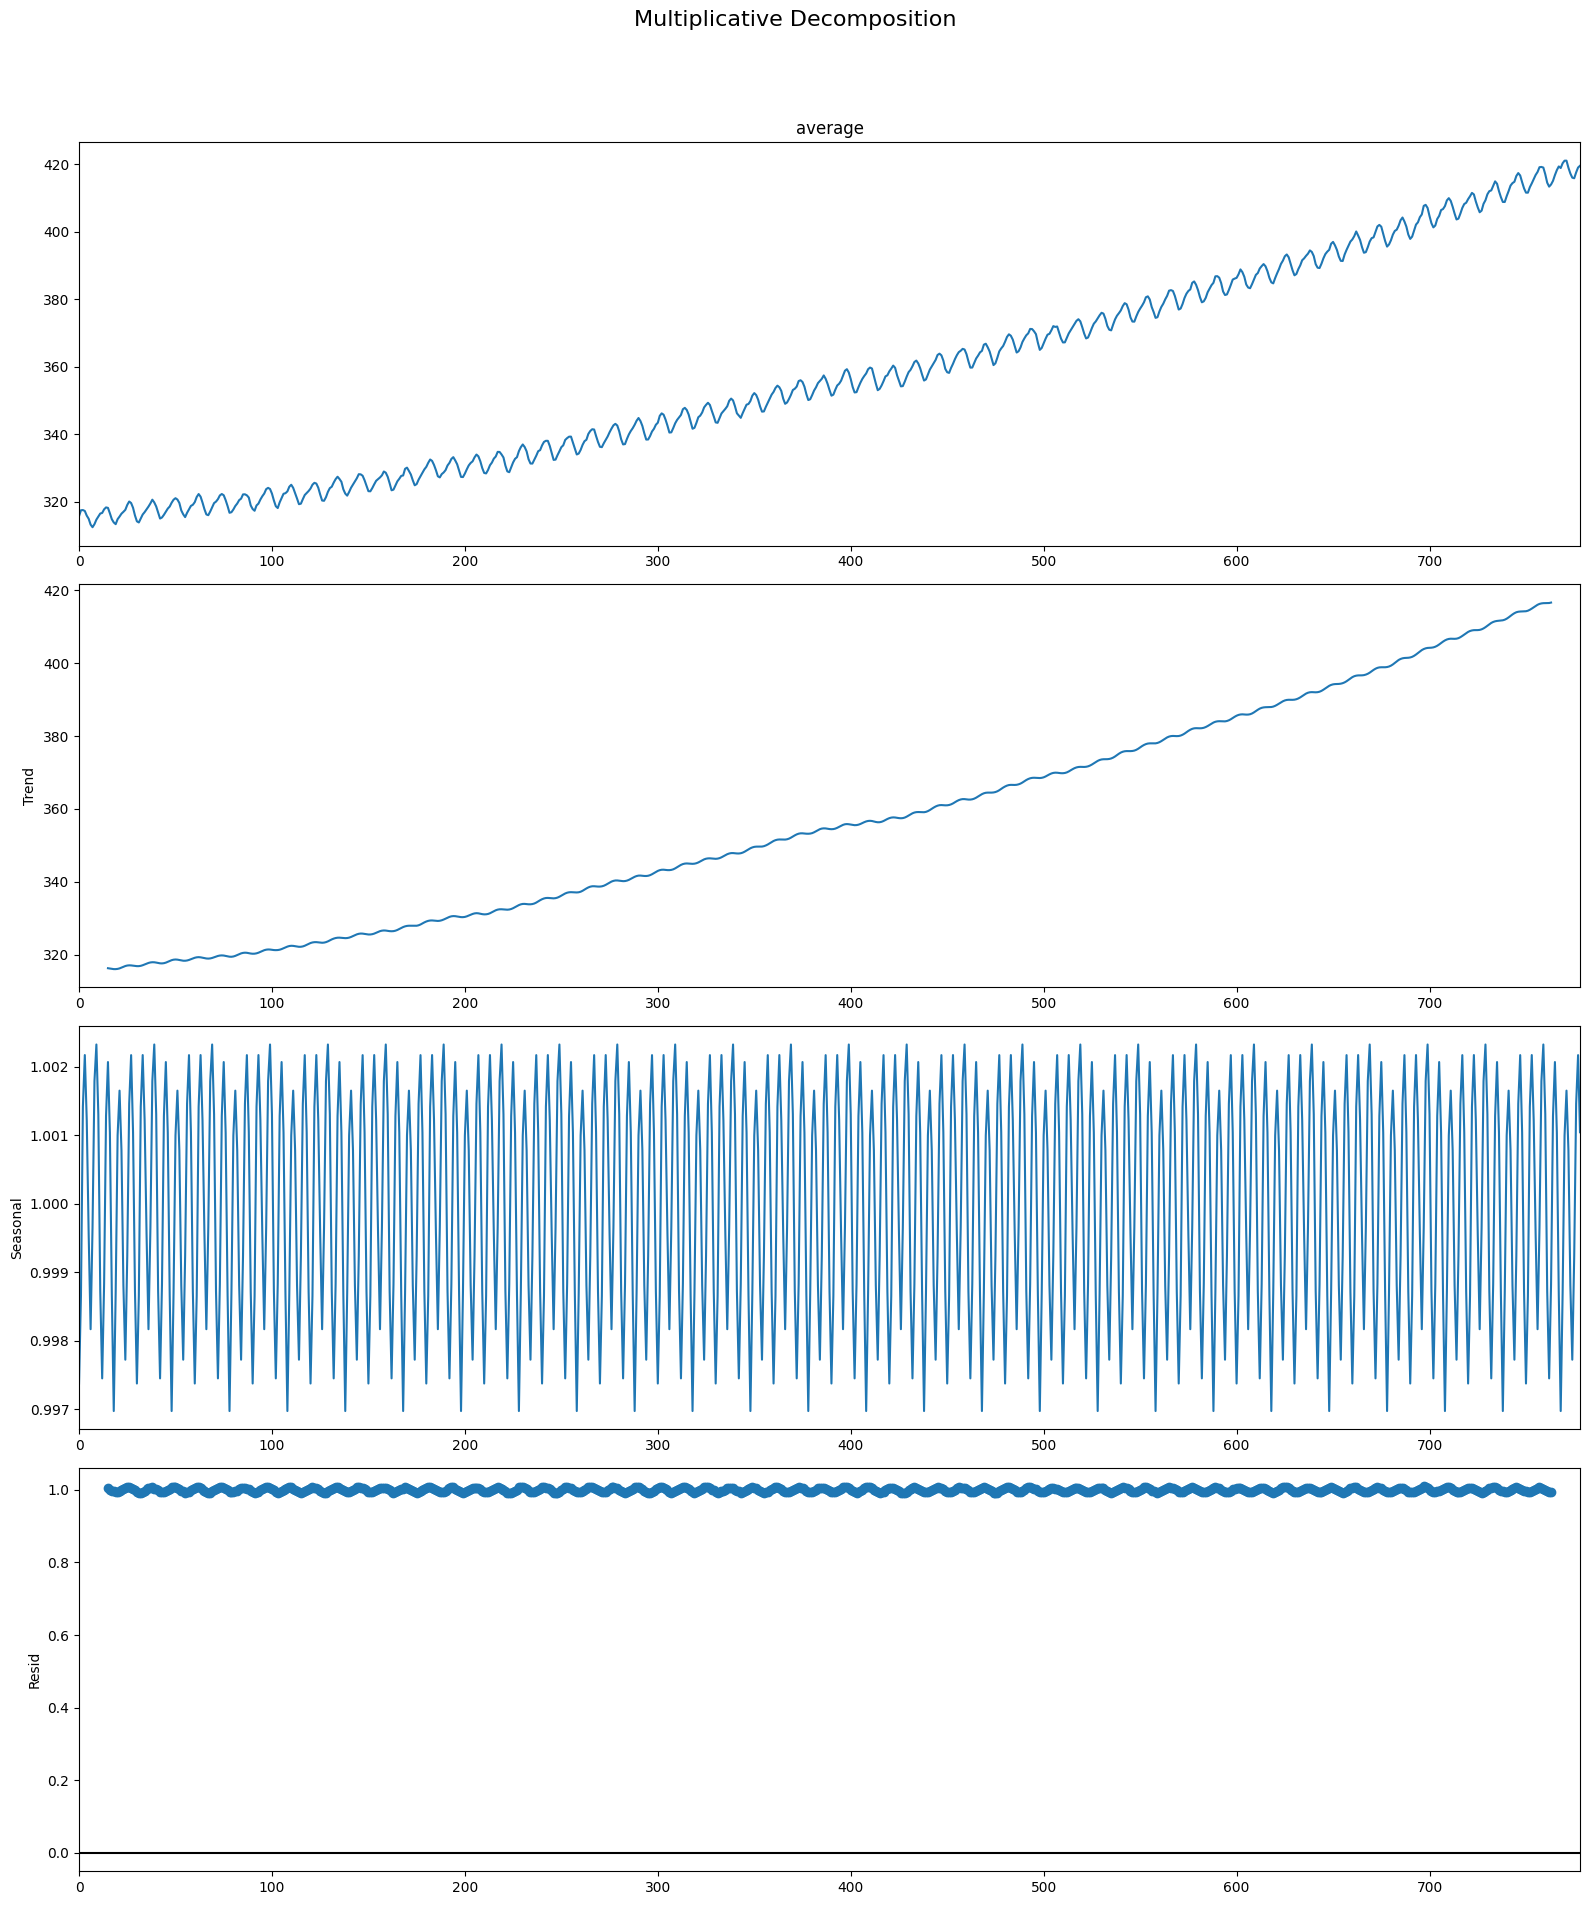

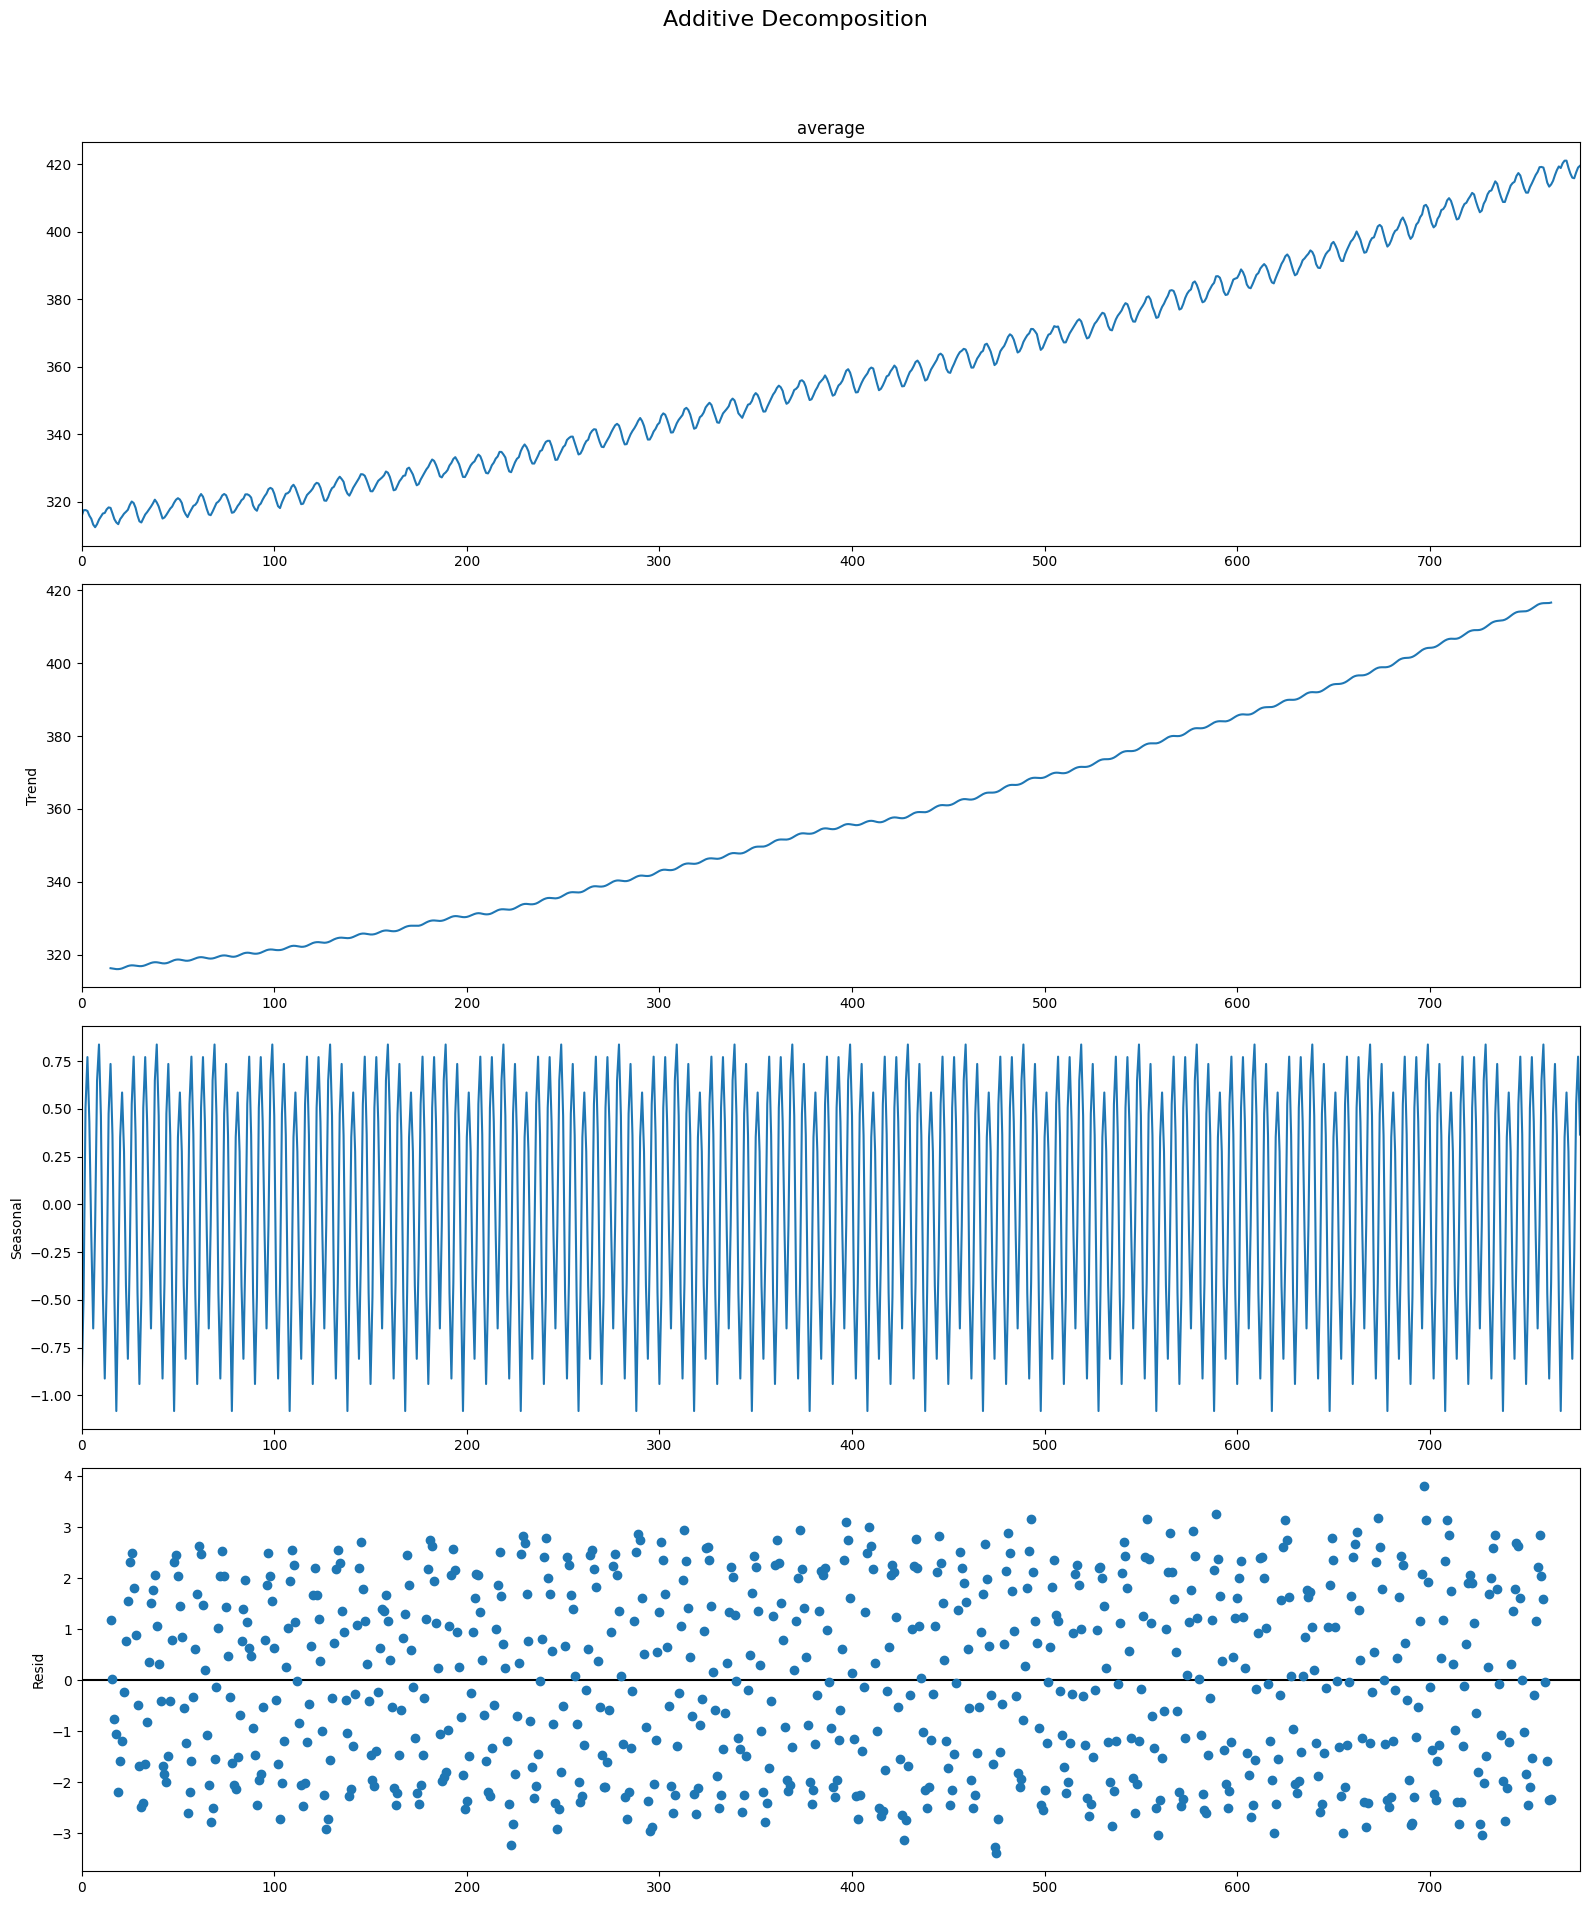

In [11]:
# # Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(df['average'], model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(df['average'], model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,20)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()